<a href="https://colab.research.google.com/github/nsm-web/1nema.github.io/blob/master/Dogs_vsCatsImageClassification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 
# (1 = dog, 0 = cat)

Télécharget dataset

In [ ]:
!wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip

--2022-04-19 08:28:35--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.78.216.154, 2600:1417:8000:9b2::e59, 2600:1417:8000:980::e59, ...
Connecting to download.microsoft.com (download.microsoft.com)|23.78.216.154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘kagglecatsanddogs_3367a.zip’

kagglecatsanddogs_3 100%[===================>] 786.68M  92.4MB/s    in 8.6s    

2022-04-19 08:28:44 (91.2 MB/s) - ‘kagglecatsanddogs_3367a.zip’ saved [824894548/824894548]



##Dézipper le dataset

In [ ]:
! unzip kagglecatsanddogs_3367a.zip

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: PetImages/Dog/5500.jpg  
  inflating: PetImages/Dog/5501.jpg  
  inflating: PetImages/Dog/5502.jpg  
  inflating: PetImages/Dog/5503.jpg  
  inflating: PetImages/Dog/5504.jpg  
  inflating: PetImages/Dog/5505.jpg  
  inflating: PetImages/Dog/5506.jpg  
  inflating: PetImages/Dog/5507.jpg  
  inflating: PetImages/Dog/5508.jpg  
  inflating: PetImages/Dog/5509.jpg  
  inflating: PetImages/Dog/551.jpg   
  inflating: PetImages/Dog/5510.jpg  
  inflating: PetImages/Dog/5511.jpg  
  inflating: PetImages/Dog/5512.jpg  
  inflating: PetImages/Dog/5513.jpg  
  inflating: PetImages/Dog/5514.jpg  
  inflating: PetImages/Dog/5515.jpg  
  inflating: PetImages/Dog/5516.jpg  
  inflating: PetImages/Dog/5517.jpg  
  inflating: PetImages/Dog/5518.jpg  
  inflating: PetImages/Dog/5519.jpg  
  inflating: PetImages/Dog/552.jpg   
  inflating: PetImages/Dog/5520.jpg  
  inflating: PetImages/Dog/5521.jpg  
  inflatin

import des modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import os
import random
from keras.preprocessing.image import load_img
warnings.filterwarnings('ignore')

In [ ]:
input_path = []
label = []

for class_name in os.listdir("PetImages"):
  for path in os.listdir("PetImages/"+class_name):
    if class_name == 'Cat':
      label.append(0)
    else:
      label.append(1)
    input_path.append(os.path.join("PetImages", class_name, path))
print(input_path[0], label[0])

PetImages/Dog/11184.jpg 1


In [ ]:
# print(input_path[10], label[10])
# len(label)
df = pd.DataFrame()
df['images'] = input_path
df['label'] = label
df = df.sample(frac=1).reset_index(drop=True)
df.head()

images  label
0   PetImages/Cat/1244.jpg      0
1   PetImages/Cat/3871.jpg      0
2   PetImages/Cat/5292.jpg      0
3   PetImages/Cat/8796.jpg      0
4  PetImages/Cat/12015.jpg      0

In [ ]:
for i in df['images']:
  if '.jpg' not in i:
    print(i)

PetImages/Dog/Thumbs.db
PetImages/Cat/Thumbs.db


In [ ]:
import PIL
l = []
for image in df['images']:
  try:
    img = PIL.Image.open(image)
  except:
    l.append(image)
l

['PetImages/Dog/11702.jpg', 'PetImages/Cat/666.jpg']

In [ ]:
# Delete db files
df = df[df['images']!='PetImages/Dog/Thumbs.db']
df = df[df['images']!='PetImages/Cat/Thumbs.db']
df = df[df['images']!='PetImages/Cat/666.jpg']
df = df[df['images']!='PetImages/Dog/11702.jpg']
len(df)

24998

Exploratory Data Analysis

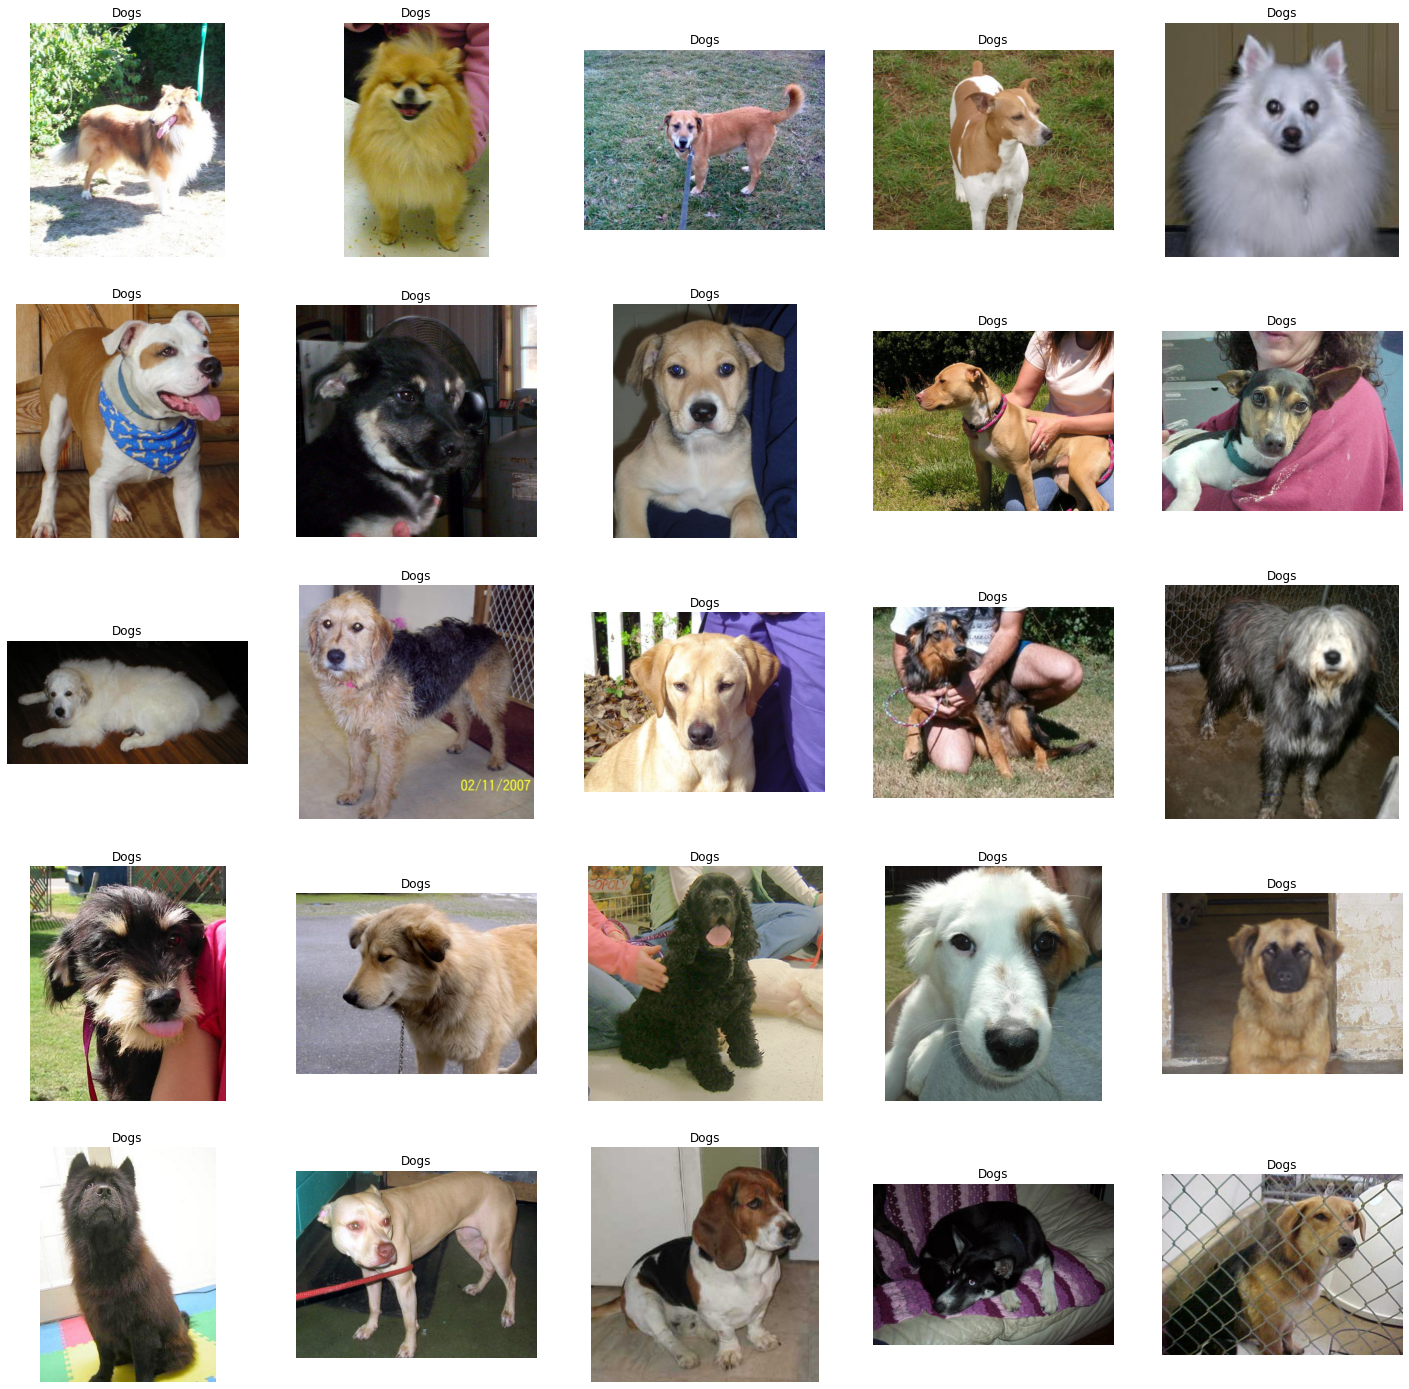

In [ ]:
#to display grid of images
plt.figure(figsize=(25,25))
temp = df[df['label']==1]['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
  plt.subplot(5,5, index+1)
  img = load_img(file)
  img = np.array(img)
  plt.imshow(img)
  plt.title('Dogs')
  plt.axis('off')

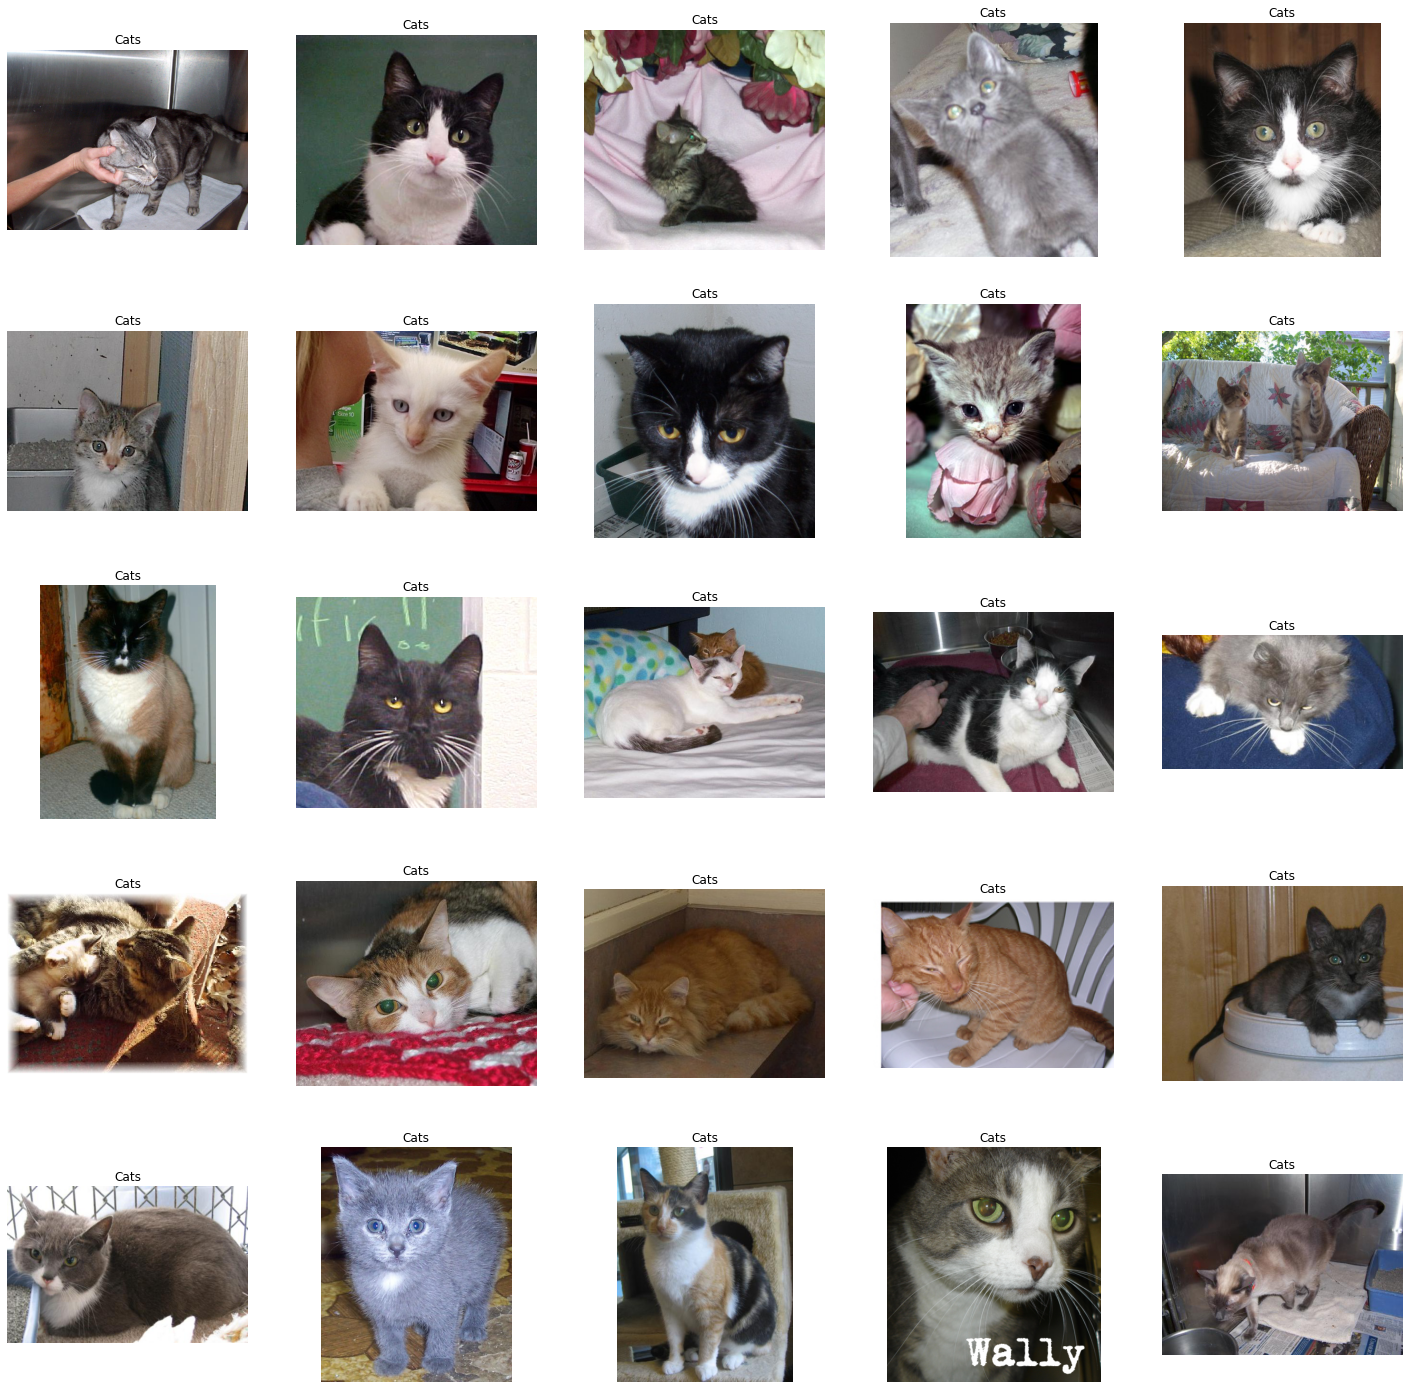

In [ ]:
#to display grid of images
plt.figure(figsize=(25,25))
temp = df[df['label']==0]['images']
start = random.randint(0, len(temp))
files = temp[start:start+25]

for index, file in enumerate(files):
  plt.subplot(5,5, index+1)
  img = load_img(file)
  img = np.array(img)
  plt.imshow(img)
  plt.title('Cats')
  plt.axis('off')

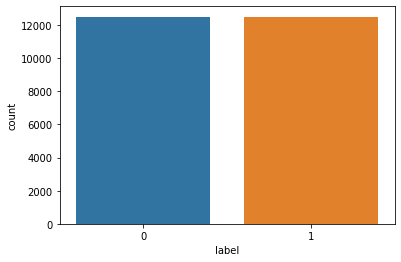

In [ ]:
import seaborn as sns
sns.countplot(df['label'])

In [ ]:
df['label'] = df['label'].astype('str')

In [ ]:
df.head()

images label
0   PetImages/Cat/1244.jpg     0
1   PetImages/Cat/3871.jpg     0
2   PetImages/Cat/5292.jpg     0
3   PetImages/Cat/8796.jpg     0
4  PetImages/Cat/12015.jpg     0

Create DataGenerator for the images

In [ ]:
#input split
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
test.head()

images label
6869   PetImages/Cat/7850.jpg     0
22914  PetImages/Dog/3586.jpg     1
9669   PetImages/Dog/1019.jpg     1
13639  PetImages/Dog/4649.jpg     1
23341  PetImages/Dog/1268.jpg     1

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_generator = ImageDataGenerator(
    rescale = 1./255, #normalization of images
    rotation_range = 40, #augmentation of images to avoid overfitting
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip= True,
    fill_mode = 'nearest'
)

val_generator = ImageDataGenerator(rescale = 1./255)

train_iterator = train_generator.flow_from_dataframe(
    train,
    x_col='images',
    y_col='label',
    target_size=(128,128),
    batch_size=512,
    class_mode='binary'
    )

val_iterator = val_generator.flow_from_dataframe(
    test,
    x_col='images',
    y_col='label',
    target_size=(128,128),
    batch_size=512,
    class_mode='binary'
    )

Found 19998 validated image filenames belonging to 2 classes.
Found 5000 validated image filenames belonging to 2 classes.


Model Creation

In [ ]:
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = Sequential([
                    Conv2D(16, (3,3), activation='relu', input_shape=(128,128,3)),
                    MaxPool2D((2,2)),
                    Conv2D(32, (3,3), activation='relu'),
                    MaxPool2D((2,2)),
                    Conv2D(64, (3,3), activation='relu'),
                    MaxPool2D((2,2)),
                    Flatten(),
                    Dense(512, activation='relu'),
                    Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 63, 63, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 14, 14, 64)      

In [47]:
history = model.fit(train_iterator, epochs=50, validation_data=val_iterator)

Epoch 1/50
40/40 [==============================] - 144s 4s/step - loss: 0.7049 - accuracy: 0.5567 - val_loss: 0.6271 - val_accuracy: 0.6608
Epoch 2/50
40/40 [==============================] - 141s 4s/step - loss: 0.5991 - accuracy: 0.6811 - val_loss: 0.5570 - val_accuracy: 0.7174
Epoch 3/50
40/40 [==============================] - 140s 3s/step - loss: 0.5700 - accuracy: 0.7051 - val_loss: 0.5259 - val_accuracy: 0.7326
Epoch 4/50
40/40 [==============================] - 144s 4s/step - loss: 0.5436 - accuracy: 0.7217 - val_loss: 0.5115 - val_accuracy: 0.7430
Epoch 5/50
40/40 [==============================] - 145s 4s/step - loss: 0.5304 - accuracy: 0.7311 - val_loss: 0.4928 - val_accuracy: 0.7580
Epoch 6/50
40/40 [==============================] - 144s 4s/step - loss: 0.5247 - accuracy: 0.7353 - val_loss: 0.4670 - val_accuracy: 0.7730
Epoch 7/50
40/40 [==============================] - 143s 4s/step - loss: 0.4965 - accuracy: 0.7561 - val_loss: 0.4651 - val_accuracy: 0.7680
Epoch 8/50
40

##Visualization of Results

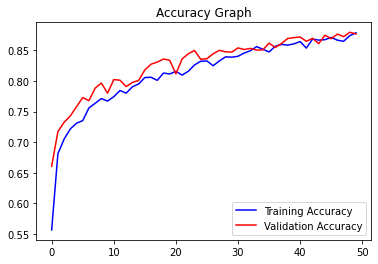

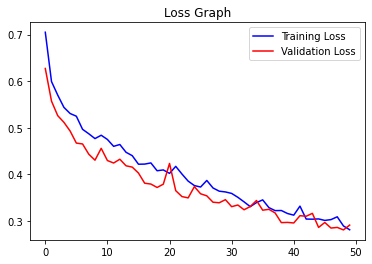

In [51]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()

loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()